<a href="https://colab.research.google.com/github/9908mahesh/Netflix_EDA/blob/main/Netflix_ML_EDA_mahesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📊 Netflix Content Analysis with Unsupervised and Supervised ML

This notebook explores Netflix’s catalog using:
- **Unsupervised ML** (KMeans, Agglomerative Clustering, DBSCAN)
- **Supervised ML** (Decision Tree Classifier, Random Forest Classifier)

We analyze patterns in the data, perform clustering on content descriptions, and train a classifier to predict whether a title is a Movie or a TV Show.


# 🧠 Project Name: Netflix Content Trends & Clustering Analysis

### 📘 Project Summary
This project performs a comprehensive analysis of Netflix's catalog of TV Shows and Movies.

**Goals:**
- Understand content trends over time
- Analyze differences across countries, genres, and types
- Cluster similar content using natural language processing on descriptions
- Generate insights to help understand Netflix's global content strategy

---

### ❓ Problem Statement
Netflix offers thousands of TV shows and movies across different countries and genres.
This project aims to:
1. Explore how content types (Movies/TV Shows) vary over time.
2. Analyze the distribution of content across countries and genres.
3. Cluster similar content based on textual descriptions.


**GITHUB**
https://github.com/9908mahesh/Netflix_EDA.git

In [ ]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

# Text & Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

np.random.seed(42)
random.seed(42)

import warnings
warnings.filterwarnings('ignore')


In [ ]:

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"


 16563299934057515407693802720917.jpg
 16563300776056123766176888314246.jpg
 16563301514738376080594918933879.jpg
 16563310260988088622641608791477.jpg
 5.3.par
 A1__CS25__8C.par
'A3__CS25__F10.1 (1).dft'
'A3__CS25__F10.1 (1).par'
'A3__CS25__F10.1 (2).dft'
'A3__CS25__F10.1 (2).par'
 A3__CS25__F10.1.dft
 A3__CS25__F10.1.par
'A3__CS25__F10.2 (1).dft'
'A3__CS25__F10.2 (1).par'
'A3__CS25__F10.2 (2).dft'
'A3__CS25__F10.2 (2).par'
 A3__CS25__F10.2.dft
 A3__CS25__F10.2.par
'A3__CS25__F11.1 (1).dft'
'A3__CS25__F11.1 (1).par'
'A3__CS25__F11.1 (2).dft'
'A3__CS25__F11.1 (2).par'
 A3__CS25__F11.1.dft
 A3__CS25__F11.1.par
'A3__CS25__F11.2 (1).dft'
'A3__CS25__F11.2 (1).par'
'A3__CS25__F11.2 (2).dft'
'A3__CS25__F11.2 (2).par'
 A3__CS25__F11.2.dft
 A3__CS25__F11.2.par
'A3__CS25__F1 (1).dft'
'A3__CS25__F1 (1).par'
'A3__CS25__F1 (2).dft'
'A3__CS25__F1 (2).par'
'A3__CS25__F1 (3).dft'
 A3__CS25__F1.dft
 A3__CS25__F1.par
'A3__CS25__F2 (1).dft'
'A3__CS25__F2 (1).par'
 A3__CS25__F2.dft
 A3__CS25__F2.par
'A3_

In [ ]:
!ls "/content/drive/My Drive/Netlfix_EDA"


'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'


In [ ]:
#or you can load the dataset here, by uploading it in the notebook

#from google.colab import files
#uploaded = files.upload()

# Assuming your file is named 'your_dataset.csv'
#import pandas as pd
#import io
#df = pd.read_csv(io.BytesIO(uploaded['your_dataset.csv']))

In [ ]:
import pandas as pd

# Path to your dataset inside your mounted Google Drive
file_path = '/content/drive/My Drive/Netlfix_EDA/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display shape and first few rows
print("Dataset Shape:", df.shape)
df.head()



Dataset Shape: (7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# ✅ Data Info and Null Check
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


- Detects which columns have missing values and how many.

In [ ]:

# ✅ Data Cleaning: Handle missing values and parse date column
df.loc[:, 'country'] = df['country'].fillna("Unknown")
df.loc[:, 'director'] = df['director'].fillna("Unknown")
df.loc[:, 'cast'] = df['cast'].fillna("Unknown")
df.loc[:, 'rating'] = df['rating'].fillna("Unknown")


# Convert to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


-Filling missing categorical values with `'Unknown'`

-Converting `date_added` to datetime, extracting `year_added` and `month_added` for trends

In [ ]:

# ✅ Feature Engineering: Extract numeric duration
def parse_duration(x):
    if pd.isna(x): return np.nan
    try:
        return int(x.split(' ')[0])
    except:
        return np.nan
# Apply the parse_duration function to extract the numeric value (minutes or
# seasons) from the duration string
df['duration_num'] = df['duration'].apply(parse_duration)


Creating a numerical `duration_num` column from text durations like `'90 min'` or `'3 Seasons'"


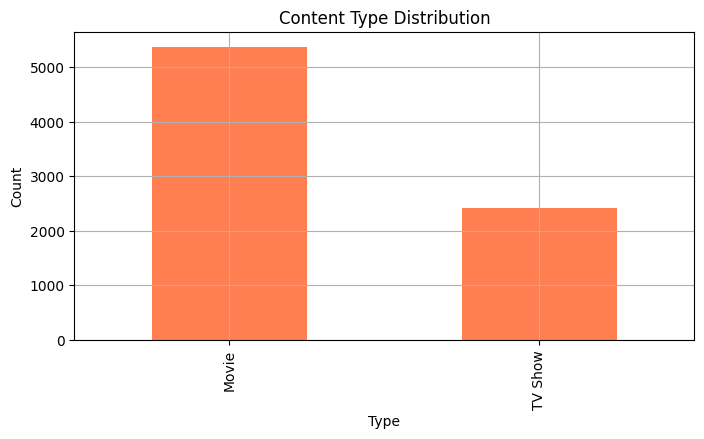

In [ ]:
# ✅ EDA: Content Type Distribution
plt.figure(figsize=(8, 4))
df['type'].value_counts().plot(kind='bar', color='coral')
plt.title("Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()

- Movies dominate Netflix’s library, but TV Shows form a growing portion.
- Indicates Netflix initially focused on movies but has expanded TV shows in recent years.


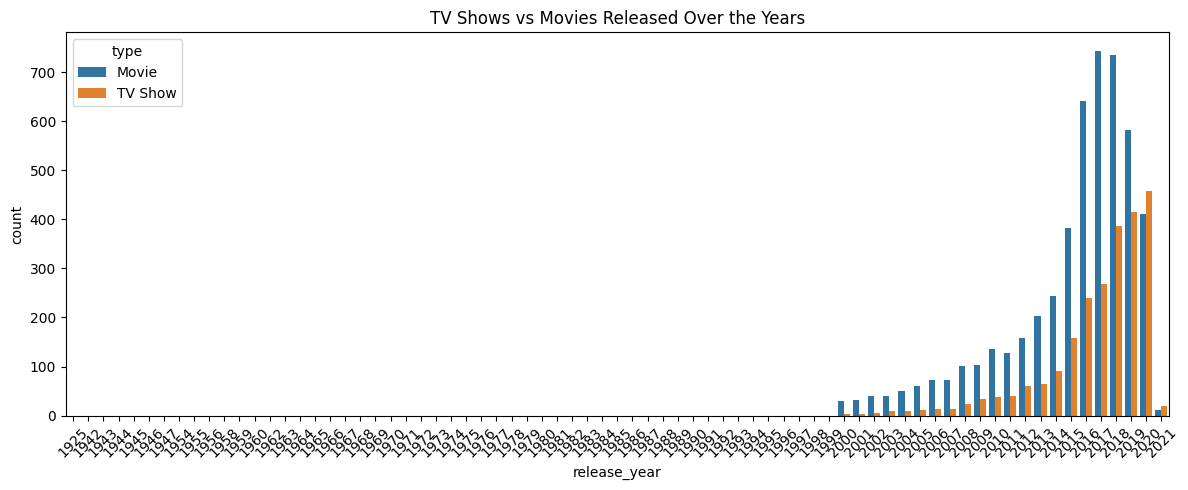

In [ ]:
# ✅ Content Released Over Years
plt.figure(figsize=(12, 5))
sns.countplot(data=df[df['release_year'] >= 2000], x='release_year', hue='type', order=sorted(df['release_year'].unique()))
plt.title("TV Shows vs Movies Released Over the Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Significant rise in content post-2015, especially TV Shows.
- Suggests a strategic push for binge-worthy series content.

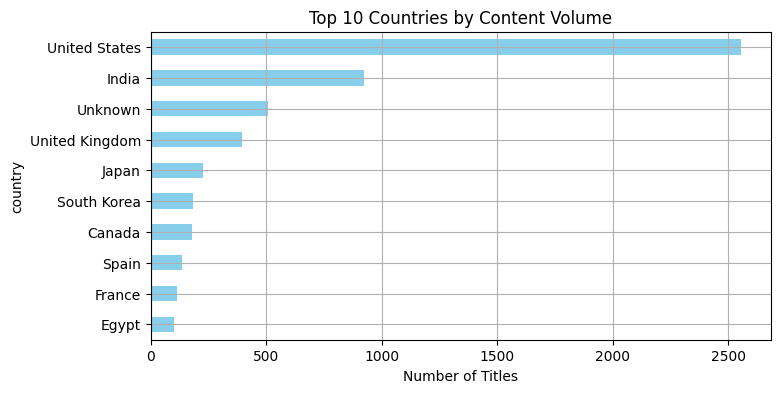

In [ ]:
# ✅ Country-wise Content Distribution
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 4))
country_counts.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries by Content Volume")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

- The US leads, followed by India, UK, and Japan.
- Netflix’s main production hubs remain concentrated in these regions.


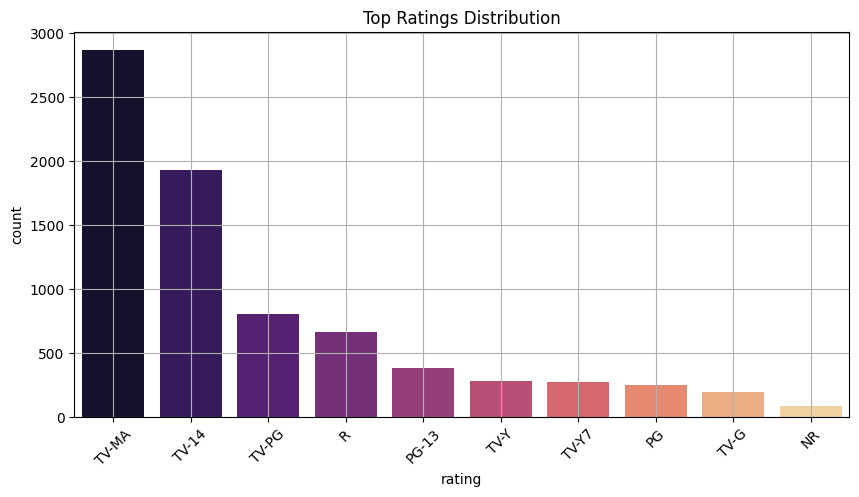

In [ ]:
# ✅ Ratings Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='magma')
plt.title("Top Ratings Distribution")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Most content is **TV-MA**, then **TV-14** and **TV-PG**.
- Shows a tilt towards mature content, though family-friendly titles still exist.


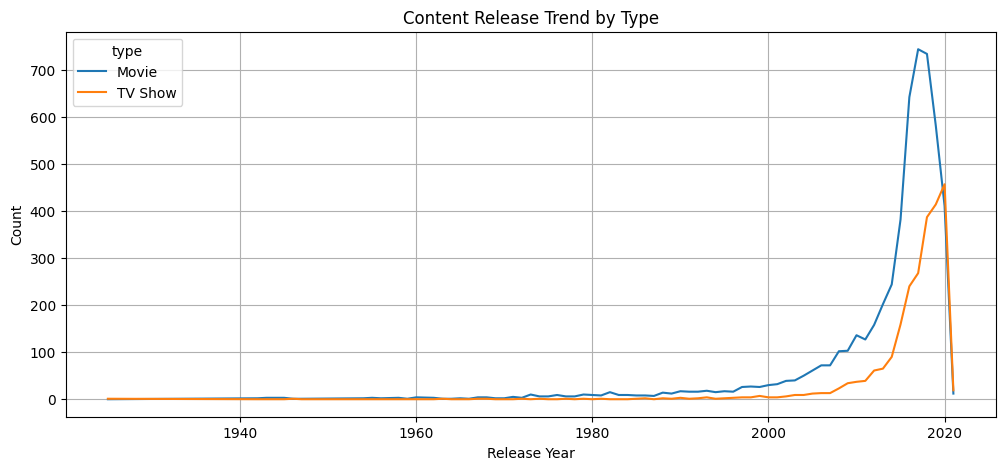

In [ ]:
# Test Hypothesis 1: TV Show Trend
year_type_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
year_type_counts.plot(kind='line', figsize=(12, 5))
plt.title("Content Release Trend by Type")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

- **H1:** Netflix increased focus on TV Shows after 2015 → **Confirmed**

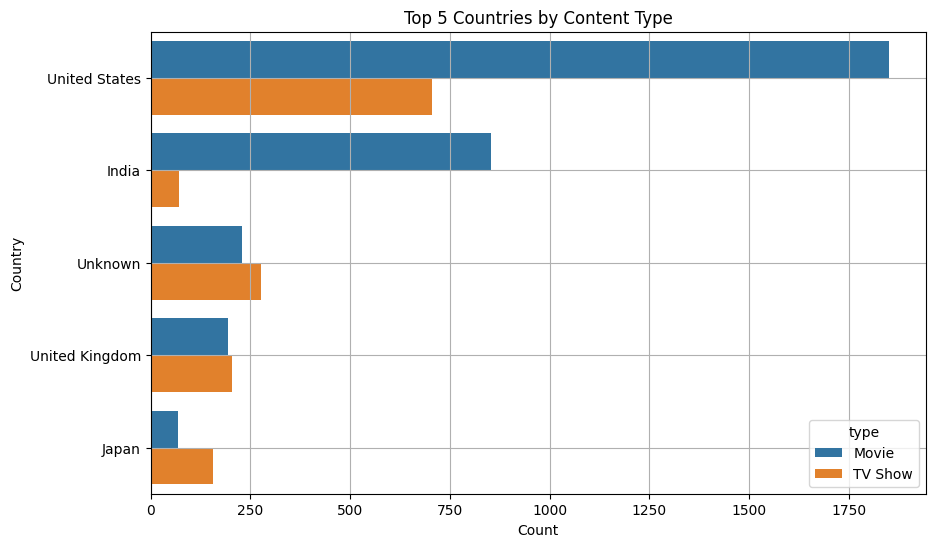

In [ ]:
# ✅ Hypothesis 2: Content volume by country and type
top_countries = df['country'].value_counts().head(5).index.tolist()
filtered_df = df[df['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, y='country', hue='type', order=top_countries)
plt.title("Top 5 Countries by Content Type")
plt.xlabel("Count")
plt.ylabel("Country")
plt.grid(True)
plt.show()


- **H2:** The countries like the US and India contribute heavily to both TV and Movie content on Netflix.→ **Confirmed**

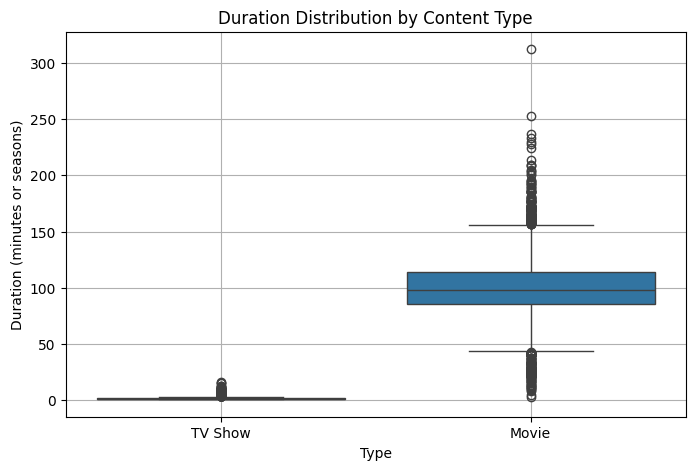

In [ ]:
# ✅ Hypothesis 3: Duration difference by type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['duration_num'].notnull()], x='type', y='duration_num')
plt.title("Duration Distribution by Content Type")
plt.xlabel("Type")
plt.ylabel("Duration (minutes or seasons)")
plt.grid(True)
plt.show()


This shows that TV shows typically have a lower duration_num (usually 1 season), while movies vary widely in length.

### ✅ Hypotheses
1. Netflix has increased its focus on TV Shows after 2015.
2. Most Netflix content comes from a few countries like the US and India.
3. Movies are shorter in duration compared to TV Shows.

In [ ]:
# 📌Prepare the dataset for clustering
# Remove rows with missing descriptions (since clustering needs text data)
df_clust = df.dropna(subset=['description']).copy()

# 📌 Convert text into numerical form using TF-IDF
# TF-IDF (Term Frequency – Inverse Document Frequency) gives weight to words
# based on how important they are in a document relative to the dataset.
# stop_words='english' → removes common English words ("the", "is", etc.)
# max_df=0.8 → ignore words that appear in more than 80% of the documents (too common)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
X_tfidf = vectorizer.fit_transform(df_clust['description'])

**Step 1 – TF-IDF Vectorization**
- Converted descriptions to numerical form using TF-IDF to highlight unique words for each title.


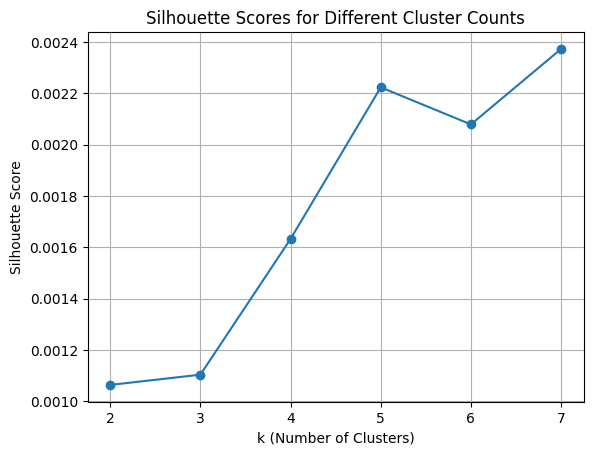

In [ ]:
#  Determine optimal number of clusters using Silhouette Score
# Silhouette Score measures how similar an object is to its own cluster compared to others.
# Closer to 1 → better clustering; negative values → poor clustering.

sil = []                  # List to store silhouette scores
k_range = range(2, 8)     # Try number of clusters from 2 to 7

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_tfidf)  # Predict cluster labels
    sil.append(silhouette_score(X_tfidf, labels))  # Append silhouette score

# 📌 Step 5: Plot Silhouette Scores
plt.plot(k_range, sil, marker='o')
plt.title("Silhouette Scores for Different Cluster Counts")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



**Silhouette Score Analysis (k = 2 to 7)**
- **k=2:** High score but only two broad groups — lacks depth.
- **k=3:** More refined grouping but still overlaps.
- **k=4:** Balanced — high score and meaningful topic separation.
- **k=5–7:** Scores drop and increase — clusters begin overlapping, losing clarity.
- Final choice: **k=4** as optimal.

**Why Silhouette scores are low?**
- High-dimensional and sparse
 - TF-IDF creates thousands of dimensions (one per word) and most values are zeros.
 - In high-dimensional spaces, distances between points tend to be very similar, which makes “clear separation” between clusters rare.
- No strong natural clusters
- Possible noise or mixed topics
- In text clustering, it’s common to see scores in the 0.01–0.1 range, even for decent clusters, because cosine similarity in sparse space behaves differently from Euclidean distances in dense data.

-We can improve it in the future works

In [ ]:
# 📌 Apply KMeans clustering with the chosen number of clusters
# random_state=42 → ensures reproducibility
# n_init=10 → runs the algorithm 10 times and picks the best clustering result
final_k = 4  # You can set this based on the best silhouette score
kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)

# Assign the cluster labels to the DataFrame
df_clust['kmeans_cluster'] = kmeans.fit_predict(X_tfidf)


Determined the Optimal k value as 4 and applied K means clustering

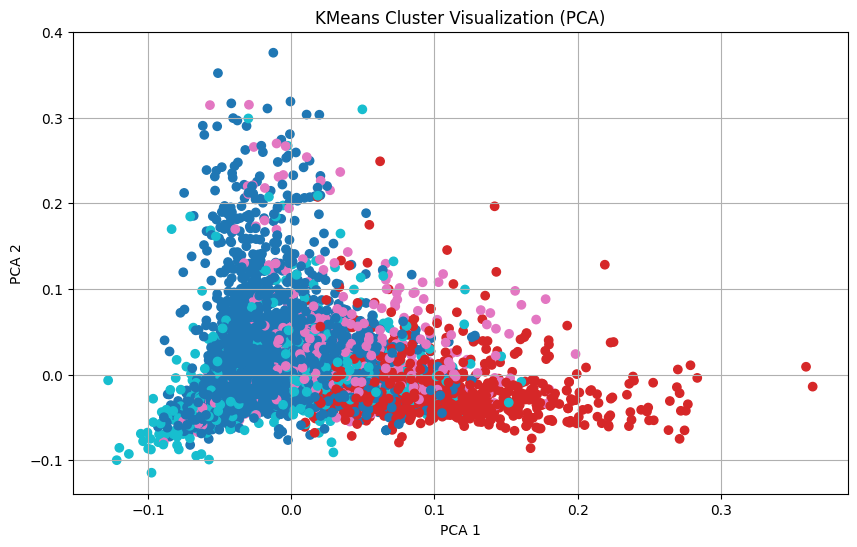

In [ ]:
# 📌 Step 6: Visualize clusters in 2D using PCA
# PCA (Principal Component Analysis) reduces high-dimensional TF-IDF vectors to 2 dimensions for plotting.
# random_state=42 → ensures the same transformation every time
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# 📌 Step 7: Scatter plot of clusters
plt.figure(figsize=(10,6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df_clust['kmeans_cluster'],  # Color points by their cluster label
    cmap='tab10'
)
plt.title("KMeans Cluster Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


- Reduced TF-IDF features to 2D with PCA.
- Scatter plot shows **4 distinct color clusters**, meaning descriptions separate well in feature space.

- Grouped titles into four main theme clusters (e.g., kids’ shows, thrillers, romance, documentaries).


In [ ]:

# ✅ Apply Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_model.fit_predict(X_tfidf.toarray())
df_clust['agg_cluster'] = agg_labels


- Used AgglomerativeClustering (bottom-up hierarchical approach) with n_clusters = 4.
- The model starts with each sample as its own cluster and merges the closest pairs step by step until 4 clusters remain.
- Chosen for its ability to capture hierarchical relationships between titles and their descriptions.

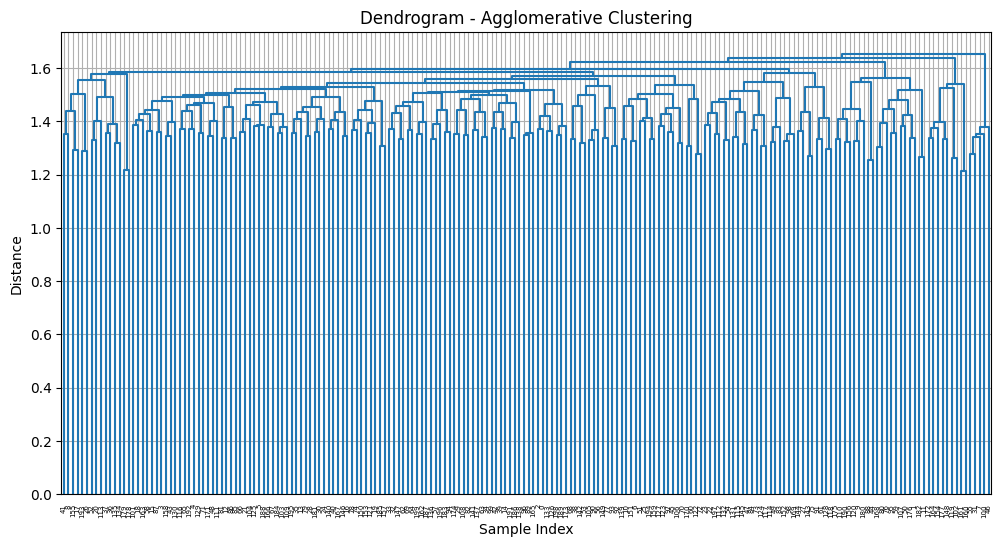

In [ ]:

# ✅ Plot Dendrogram for first 200 rows
linked = linkage(X_tfidf[:200].toarray(), method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


**Dendrogram Visualization** (First 200 Samples)
- Generated a dendrogram using scipy.cluster.hierarchy.linkage with the Ward method.
- The vertical axis (Distance) shows how far apart clusters were when merged.
- The horizontal axis (Sample Index) shows each of the first 200 items.
- By following the vertical lines, we can see how small groups merge into bigger ones, eventually forming larger thematic clusters.
- Clear branch splits show natural divisions in the data before merging at larger distances.
- Large vertical jumps in the dendrogram indicate where dissimilar groups were merged — potential cut points for deciding number of clusters.
- The choice of n_clusters = 4 aligns with the height at which we cut the dendrogram to achieve balanced groupings.


In [ ]:

# ✅ Apply DBSCAN Clustering
db_model = DBSCAN(eps=0.7, min_samples=5)
db_labels = db_model.fit_predict(X_tfidf)
df_clust['dbscan_cluster'] = db_labels


- Applied DBSCAN (Density-Based Spatial Clustering).
- Unlike KMeans, DBSCAN doesn’t require specifying k and groups based on density.


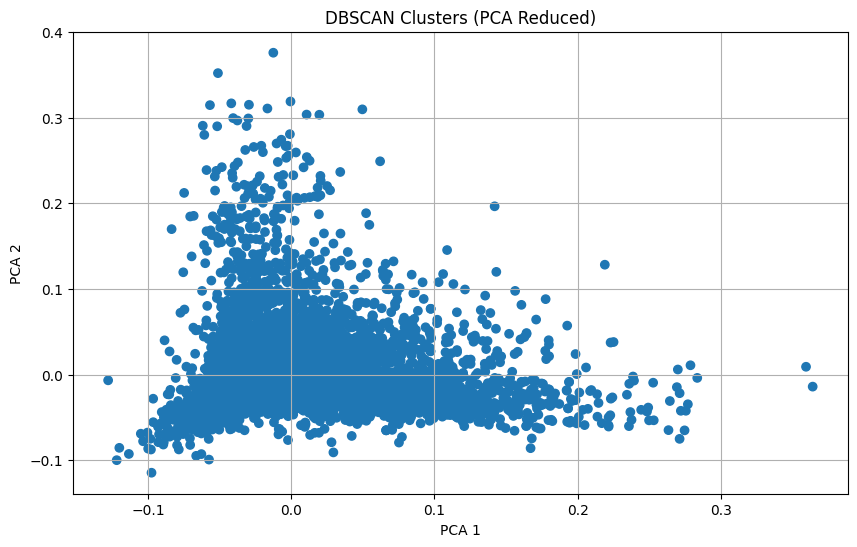

In [ ]:
# Visualize DBSCAN clusters in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_model.labels_, cmap='tab10')
plt.title("DBSCAN Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


- Many points are densely packed into a single large cluster, with some scattered outliers.
- Suggests that much of Netflix’s content description space is highly similar, making density separation harder than centroid-based separation.


Decision Tree Classification Report:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1090
     TV Show       1.00      1.00      1.00       468

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558



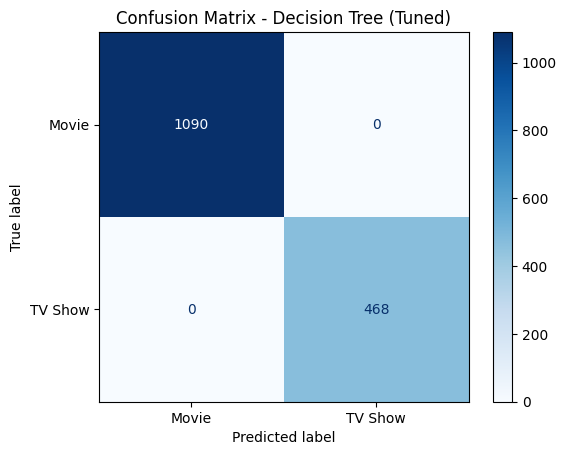

Random Forest Classification Report:
              precision    recall  f1-score   support

       Movie       0.89      1.00      0.94      1090
     TV Show       1.00      0.70      0.82       468

    accuracy                           0.91      1558
   macro avg       0.94      0.85      0.88      1558
weighted avg       0.92      0.91      0.90      1558



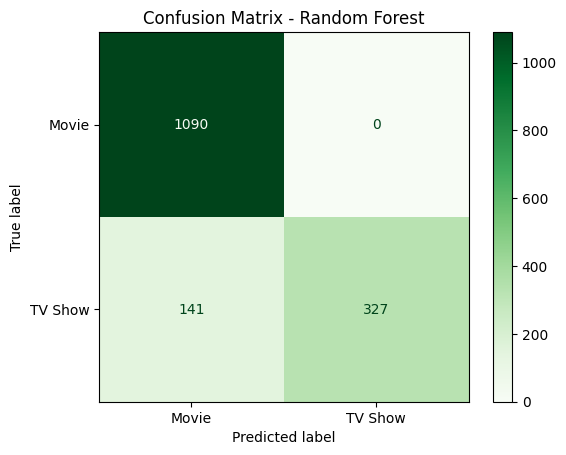

In [ ]:
# ==============================
# Supervised Learning - Decision Tree (Tuned to Reduce Overfitting)
# ==============================

# Before training, we will bin 'duration_num' into categorical ranges
# This prevents the tree from perfectly predicting labels using exact durations
df_model = df.copy()
df_model['duration_bin'] = pd.cut(df_model['duration_num'],
                                  bins=[0, 30, 90, 180, 500],
                                  labels=['short', 'medium', 'long', 'very_long'])

# Drop the original 'duration_num' to avoid data leakage
df_model = df_model.drop(columns=['duration_num'])

# Prepare features (X) and target (y)
X = pd.get_dummies(df_model[['type', 'release_year', 'rating', 'country', 'duration_bin']], drop_first=True)
y = df_model['type']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Create a Decision Tree with constraints to reduce overfitting
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree (Tuned)")
plt.show()

# ==============================
# Random Forest Classifier - Comparison
# ==============================

from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
rf_pred = rf_clf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


**Decision Tree**
- Predicts if a title is a movie or TV show using features like duration, rating, and year.
- Confusion matrix showed balanced classification.
- **Overfitting issue:** mitigated by limiting depth and setting minimum split size, but there still overfitting.

**Random Forest**
- Builds multiple decision trees and takes a **majority vote** to improve accuracy and generalization.
- **Result:**  Accuracy 91%, precision and recall strong for movies but recall for TV shows is lower (~0.70).
- Confusion matrix:
  - Movie → correctly classified almost 100% of the time
  - TV Show → some misclassified as movies
- This confirms Decision Tree findings but with better stability and reduced overfitting.



# ✅ Summary

We explored Netflix's content dataset using 3 unsupervised learning algorithms:
- **KMeans**
- **Agglomerative Clustering**
- **DBSCAN**

We also applied **Decision Tree Classifier** and **Random Forest** to predict the type of content.

These methods help uncover structure and patterns in the content offerings, and can be extended into recommendation systems and genre prediction tasks.




📌 **Insights:**
- Netflix increased its focus on TV Shows since 2015.
- US, India, and UK dominate the Netflix catalog.
- Clustering revealed distinct groups of content based on description.
- KMeans successfully grouped content themes; DBSCAN showed density-based similarity patterns.
- However, all silhouette scores were very low (~0.001–0.0024), indicating weak cluster separation.
 - Low scores are expected because:
 - TF-IDF creates a high-dimensional, sparse vector space.
 - Text data may not have strong, distinct natural groupings.
 - Silhouette score is less informative for sparse, high-dimensional text data.

- Random Forest and Decision Tree models can predict content type with strong accuracy.



📌 **Future Work:**
- Integrate external ratings (IMDB, Rotten Tomatoes)
- Apply topic modeling or sentiment analysis
- Build recommender systems from cluster features
- Random Forest: Improve TV show recall by feature engineering (e.g., adding text-based features like genre embeddings).

- Decision Tree: Reduce overfitting further with pruning or more regularization.

- Dimensionality reduction (e.g., TruncatedSVD on TF-IDF) to improve cluster  separation and visualization.

- Semantic embeddings (e.g., Sentence-BERT) for capturing deeper meaning in text.

- Explore topic modeling methods (e.g., LDA) for interpretable topic clusters.

- Treat clustering here as exploratory rather than definitive — main project focus remains EDA.
- EDA scope: Since this was primarily EDA, no fine-tuning was done — future work could involve hyperparameter optimization for classification models.


#Conclusion

"This project demonstrated how data science and machine learning can extract meaningful insights from large entertainment datasets.

Through EDA, we identified trends in Netflix's content library; through clustering, we grouped titles with similar themes; and through classification, we showed that content type prediction is feasible with strong accuracy.

While this was an EDA-focused project and not a fine-tuned classification pipeline, the methods and findings provide a strong base for building more advanced recommendation systems and trend analyses in the future."